In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
import wordcloud
from wordcloud import WordCloud
import nltk

In [2]:
import source
import ngrams
import roberta

In [3]:
filename = "CSW8 (S22) Reflection (Week 7) (Responses).xlsx"

In [4]:
df = pd.read_excel(filename)
df.fillna("None", inplace=True)
df = df.astype(str)

In [5]:
print(df.columns)

Index(['Timestamp', 'Email Address', 'How are you enjoying the course so far?',
       'Please explain what made you chose the above option.',
       'How do you feel about the material this week?',
       'Give a **specific** example/problem that you found difficult this week and explain _what_ made it challenging. ==>>> Tell us: what did you do to solve it? (Write `None` if this week's material was clear.)',
       'Which zyBooks topic this week did you find to be the easiest?',
       ' Did you encounter any counterintuitive concepts this week? Was there anything that didn't behave in a way that you predicted it should? (Write `None` if nothing surprised you.)',
       'If you could only use one, which would you use - lists or dictionaries?',
       'Feel free to share why you selected the above option. :-)',
       'Review what you said was "the most challenging concept". Is the most challenging concepts from Week 3 still challenging for you?',
       'If you have the same challeng

## General exploration
### What questions have constatnt set of answers?

How are you enjoying the course so far?


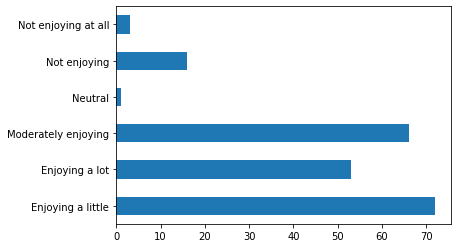

How do you feel about the material this week?


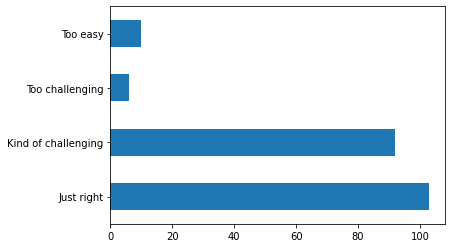

If you could only use one, which would you use - lists or dictionaries?


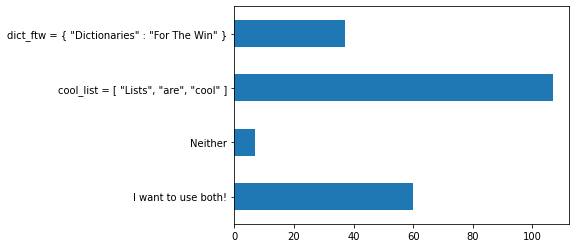

Are you able to keep up with the pace of the course?


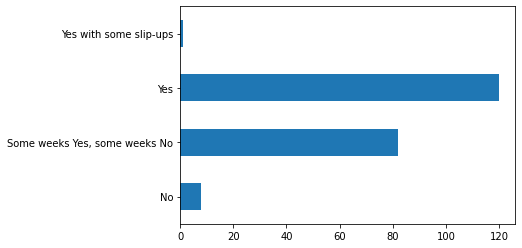

Which lab session do you attend on Wednesdays?


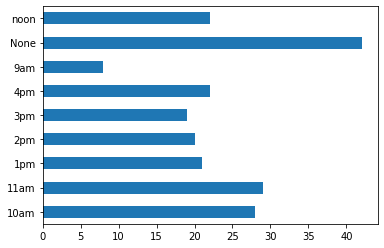

Mental Health Check-in: How are you doing this week (in general, not just in this class)?


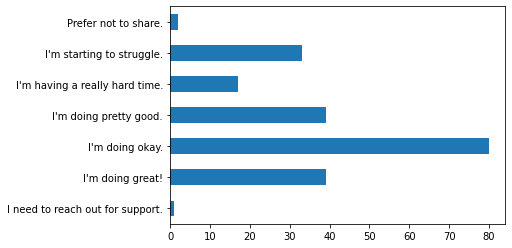

In [6]:
for col in df.columns[1:]:
    column = df.groupby([col]).size()
    if len(column) < 10:
        print(col)
        ax1 = column.plot.barh()
        y_axis = ax1.axes.get_yaxis()
        y_label = y_axis.get_label()
        y_label.set_visible(False)
        plt.show()

## Specific columns analysis

### Keep up the peace of the course

In [35]:
sel_col = 'Are you able to keep up with the pace of the course?'
col = 'Please share why you selected the above option.'

#### Thoose who said No

In [36]:
# Thoose who said no
df_no = df[df[sel_col] == "No"]
print(len(df_no))

8


In [45]:
# What did they said
for i in range(len(df_no)):
    line = df_no.iloc[i]
    print("-", line[col], ";", line['Email Address'])

- i got too much recently but i am actively doin ; linhuang@ucsb.edu
- None ; suzhehao@ucsb.edu
- None ; jinyu_yao@ucsb.edu
- None ; chengwei@ucsb.edu
- because the content seems to be overwhelmingly heavy to me. ; lei_zhao@ucsb.edu
- because I have other classes and a job and also like to take care of myself and workout  ; rmdelgado@ucsb.edu
- I feel like the course demands a lot passed what we need to learn the concepts- which are the zybooks lessons and labs. This makes it very hard to juggle topics with our many other classes.  ; duy@ucsb.edu
- None ; ncortes@ucsb.edu


#### Thoose who said Some weeks Yes, some weeks Noline

In [46]:
# Thoose who said no
df_no = df[df[sel_col] == "Some weeks Yes, some weeks No"]
print(len(df_no))

82


In [48]:
# made by me, no time to run entity recognition today, but it is in template
potential_issues = ["procrastination", "new", "loops", "work load", "quiz"]

In [47]:
# What did they said
for i in range(len(df_no)):
    line = df_no.iloc[i]
    if len(line[col]) > 5:
        print("-", line[col], ";", line['Email Address'])

- I feel like I am able to keep up with the course because I don't procrastinate, however, sometimes I have other hw from other classes that I end up doing this homework late, which takes forever for me to complete and to fully understand it.  ; cabadassanchez@ucsb.edu
- Sometimes professor K seems to introduce new concepts that are not mentioned in zybook, such as is_digit(). In this case, I have to ask TA for help. ; wentian@ucsb.edu
- On the weeks where new information is being introduced, I have to put in a lot more time and effort in trying to understand them. Since I have work to do for other classes, it can be hard to manage my time. ; kerryyu@ucsb.edu
- weeks 4-7 have fluctated in difficulty  ; angela_huang@ucsb.edu
- I realized that once the class really started picking up during week 6: Loops, I found it more and more difficult to keep up my usual routine, and it has only gotten harder. However, weeks 1-5 for me were a breeze. ; bjimenez-dominguez@ucsb.edu
- Once other classe

### Other columns

In [26]:
pattern_col = "Give a **specific** example/problem"
for col in df.columns:
    if pattern_col in col:
        break

In [27]:
try:
    df["labs"] = source.get_lab_nums(df[col])
    all_labs = {}
    for i in df["labs"]:
        for lab in i:
            all_labs[lab] = all_labs.get(lab,0) + 1
    print(all_labs)
except:
    print("No such column")

{'7.14': 12, '6.21': 2, '4.21': 1, '7.15': 4, '1.0': 1, '7.5': 4, '7.3': 3, '7.7': 1, '6.19': 1, '7.16': 1}


In [28]:
try:
    concepts = ngrams.get_n_grams(df[col])
    print(concepts[:5])
except:
    print("No such column")

[(('7', '14'), 9), (('lab', 'checkpoint'), 7), (('list', 'nesting'), 5), (('iterating', 'dictionary'), 4), (('checkpoint', 'lab'), 4)]


In [32]:
pattern_col = "What _specific_ examples/concepts"
for col in df.columns:
    if pattern_col in col:
        break

In [33]:
try:
    concepts2 = ngrams.get_n_grams(df[col])
    concepts2[:5]
except:
    print("There is no required column in this specific reflection")    

In [34]:
try:
    col = 'What can be improved about your lab section? Please be as specific as possible. Write "Perfect" if nothing can be improved.'
    val = df[df[col] == "Perfect"][col].count()#
    print(f"We, {val} students, think labs were perfect")
except:
    print("There is no required column in this specific reflection")

There is no required column in this specific reflection


## Word cloud

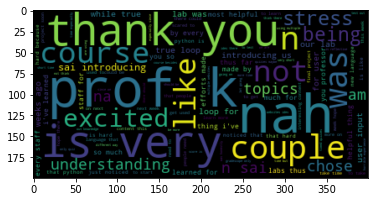

In [11]:
wordcloud = ngrams.get_words_cloud(df['Last question: any other thoughts or feedback?'])
plt.imshow(wordcloud, interpolation='bilinear')

## Sentiment analysis block

In [12]:
# get all scores from roberta model
df["last_santiment"] = roberta.get_scores_for([str(i) for i in df['Last question: any other thoughts or feedback?']])

#See how they came - neg, neu, pos
print("Example", df["last_santiment"].iloc[0])


Example [0.268388   0.49388397 0.23772788]


In [13]:
# padding issues - to slow algo, do not run
# df["last_santiment"] = roberta.get_scores([str(i) for i in df['Last question: any other thoughts or feedback?']])
# print("Example", df["last_santiment"].iloc[0])


In [14]:
# Apply the additinal rults for sorting
df["last_santiment_qua"] = df["last_santiment"].apply(lambda x: x[2] - x[0])
df["last_santiment_qua"] *= (df['Last question: any other thoughts or feedback?'].str.len() > 5)

In [15]:
#only negative
#df["last_santiment_qua"] = df["last_santiment"].apply(lambda x: x[0])

In [16]:
for i in df.sort_values(by=['last_santiment_qua'])['Last question: any other thoughts or feedback?']:
    if len(i) > 5 and "none" not in i.lower() and "nope" not in i.lower():
        print("-", i)

- I hope there could be a different way to test out knowledge of the course besides the timed quizzes. Maybe it was just the stress of it being the gradescope only quiz, and the short time, but it was honestly a horrible experience and I do not think my score is reflective of my understanding of the topics. I think there should be more time, especially since we are using multiple websites/ides. There is just a lot going on and the time is very short. 
- Wondering if there will be makeup quizzes or additional quizzes for those of us who didn't do so well on the last one. 
- Nah <3
- Two roads diverged in a yellow wood, and I chose the path less travelled by
- Not really, just looking forward to gettin through this final stretch.
- I just noticed that python is not that hard; it is "hard" because it is like a new language that people need to take time to get used to.
- I really appreciate the inspirational/motivating/perspective changing quotes.  They are thought provoking in a very good

In [39]:
val = (df["last_santiment_qua"] < 0)
print(f"We have {val.sum()}/{len(df)} negative comments")

We have 20/237 negative comments


In [ ]:

# LDA 

# latent variables models
# Conditional random field CRF

